In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
X_df = pd.read_csv('data/train.csv')
#X.drop(columns=['Unnamed: 0'], inplace=True)
X_df.head()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,...,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,0.698804,0.698276,-0.258539,0.381238,0.274783,0.261833,-0.771809,-0.762133,-1.018139,1.005961,...,0,0,0,0,0,0,0,1,0,0
1,-1.159166,-1.158730,-1.348294,-0.911835,-0.011907,0.067798,0.630635,0.534271,-1.018139,1.005961,...,0,0,0,1,0,0,0,0,0,0
2,-0.200715,-0.200776,-0.891342,0.141585,0.858403,0.724379,0.769490,0.791186,-1.018139,1.005961,...,0,0,0,0,0,0,0,0,0,0
3,-0.170178,-0.170254,-0.891342,1.443216,1.093898,1.106567,0.491779,0.375390,-1.018139,1.005961,...,0,0,0,0,0,0,0,0,0,0
4,-1.042909,-1.042533,-0.319335,1.378694,0.229732,1.475036,2.296904,2.756921,-1.018139,1.005961,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# # missing data
# total = y.isnull().sum().sort_values(ascending=False)
# percent = (y.isnull().sum()/y.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data

In [4]:
y_df = pd.read_csv('data/target.csv')

In [28]:
list(X_df.columns)

['mkt_carrier_fl_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'dest_airport_id',
 'crs_dep_time',
 'crs_arr_time',
 'crs_elapsed_time',
 'distance',
 'year',
 'month',
 'day',
 'day_of_week',
 'week_of_year',
 'crs_dep_hour',
 'crs_arr_hour',
 'month_avg_arr_delay',
 'month_avg_air_time',
 'month_avg_carrier_delay',
 'month_avg_weather_delay',
 'month_avg_nas_delay',
 'month_avg_security_delay',
 'month_avg_late_aircraft_delay',
 'day_of_week_avg_arr_delay',
 'day_of_week_avg_air_time',
 'day_of_week_avg_carrier_delay',
 'day_of_week_avg_weather_delay',
 'day_of_week_avg_nas_delay',
 'day_of_week_avg_security_delay',
 'day_of_week_avg_late_aircraft_delay',
 'arr_hour_avg_arr_delay',
 'arr_hour_avg_air_time',
 'arr_hour_avg_carrier_delay',
 'arr_hour_avg_weather_delay',
 'arr_hour_avg_nas_delay',
 'arr_hour_avg_security_delay',
 'arr_hour_avg_late_aircraft_delay',
 'origin_total_flights',
 'dest_total_flights',
 'month_flight_seats',
 'month_flight_passengers',
 'month_flight_avg_

In [6]:
#final_df, _,= scale_encoder(X)
#final_df.head()

In [7]:
y_df.head()

,arr_delay
0,-20.0
1,-15.0
2,-9.0
3,-1.0
4,-2.0


In [8]:
from src.modules.models import randforest_reg, ensemble_feature_importance, regmodel_evaluation

In [9]:
X = X_df.values
y = y_df.values.ravel()

In [10]:
print(X.shape, y.shape)

(9625, 62) (9625,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
trained_model = randforest_reg(X_train,y_train)

In [13]:
print(trained_model)

{'RandomForest_Reg': RandomForestRegressor(n_jobs=-1)}


In [14]:
regmodel_evaluation(trained_model, X_test, y_test)

RandomForest_Reg metrics:
	R2 = -0.037893029746824514
	Adjusted R2 = -0.07245230356223975
	RMSE = 46.94602062828296

*******************************************************************



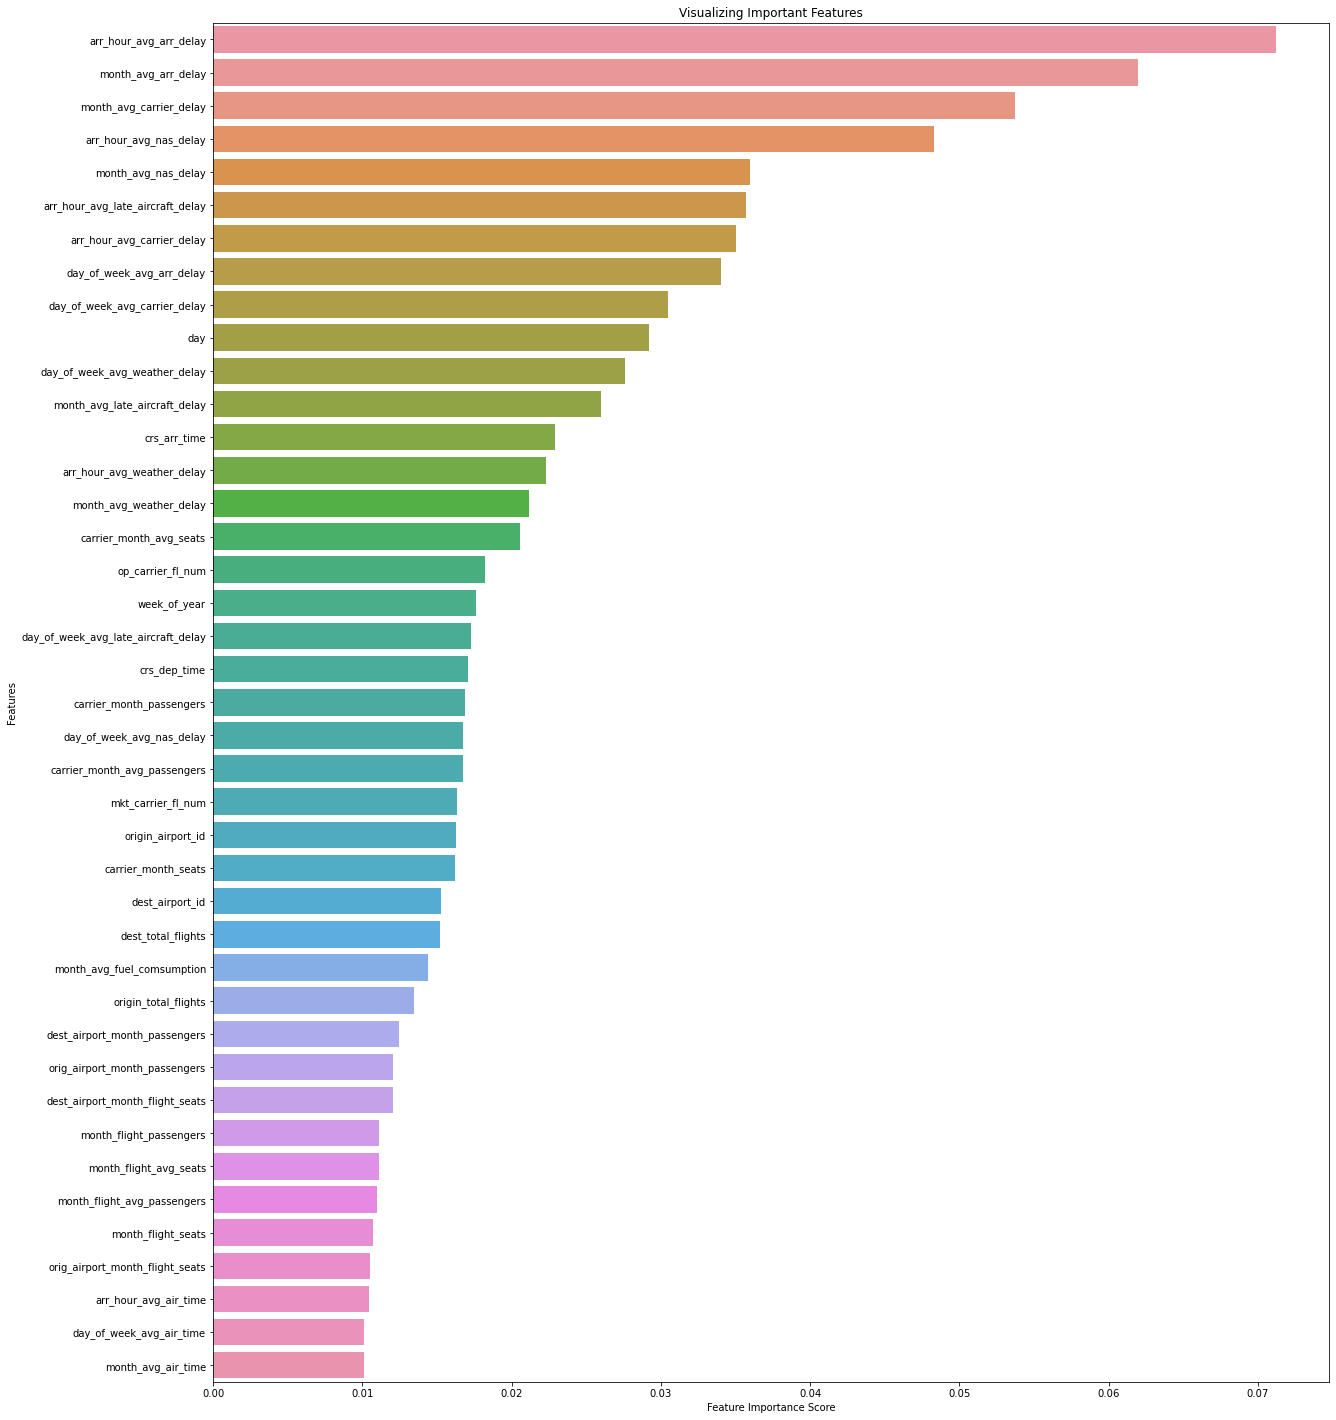

In [15]:
ensemble_feature_importance(trained_model['RandomForest_Reg'], X_df)

In [19]:
from src.modules.models import svr_reg

In [20]:
svr = svr_reg(X_train,y_train)

In [21]:
print(svr)

{'LinSVR_Reg': LinearSVR(C=1, epsilon=0.1), 'SVR_Reg': SVR(C=1, coef0=0)}


In [23]:
regmodel_evaluation(svr, X_test, y_test)

LinSVR_Reg metrics:
	R2 = -0.0027947252990192517
	Adjusted R2 = -0.03618531228534527
	RMSE = 46.145409895460055

*******************************************************************

SVR_Reg metrics:
	R2 = -0.019382379544545802
	Adjusted R2 = -0.05332529443808065
	RMSE = 46.52549996444142

*******************************************************************

